# Hebermen dataset visualization
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
>1 = the patient survived 5 years or longer, 
>2 = the patient died within 5 year

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df = pd.read_csv('haberman.csv')
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
df.shape

(306, 4)

In [5]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
df.columns
col = list(df.columns)
col.pop()
col

['age', 'year', 'nodes']

In [7]:
df.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

# objective
### our objective is that we have to predict the outcome that the person is survived due to cancer or not on the basis of certain features data points

# Univariate analysis of herbsmen dataset

/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

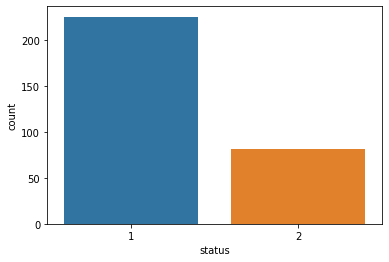

In [8]:
sb.countplot(df.status)

By observing this we conclude that the number of paitents survived more then 5 years is maximum as compare to the unsurvived patients

In [6]:
yes = df.loc[df.status==1]
no = df.loc[df.status==2]

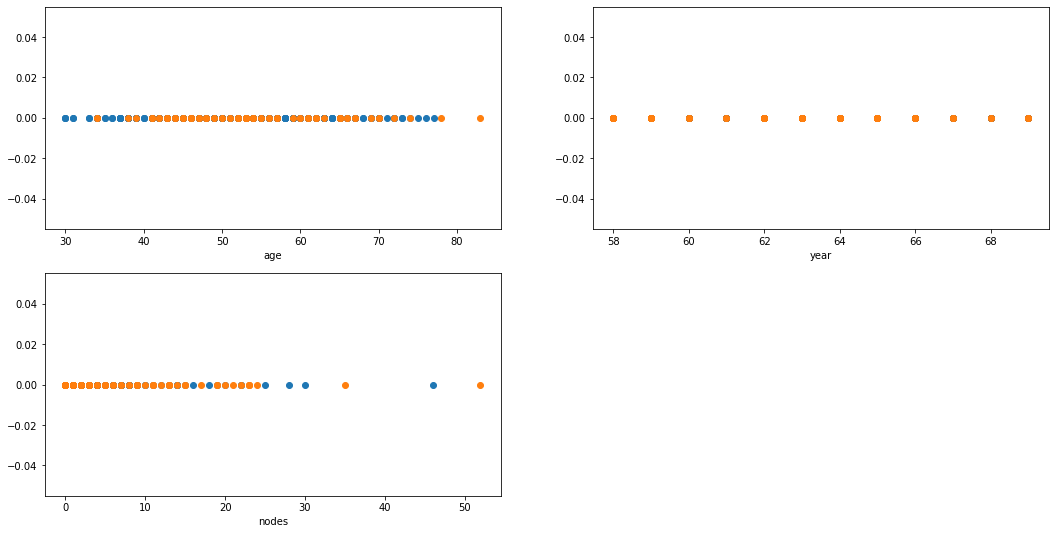

In [7]:
plt.figure(figsize=[18,9])
for i,n in enumerate(col):
    plt.subplot(2,2,i+1)
    plt.plot(yes[n],np.zeros_like(yes[n]),'o')
    plt.plot(no[n],np.zeros_like(no[n]),'o')
    plt.xlabel(n)

###### 1.This is the age determination of survived and unsurvived ages 
###### 2.But the limitation of this plot is that it doesnot differenciate clearly
###### 3.The points are overlapping

/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


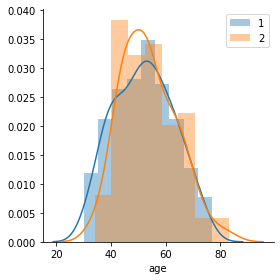

In [23]:
# pdf and histogram

sb.FacetGrid(df,hue='status',size=4).map(sb.distplot,'age')
plt.legend()
plt.show()


/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


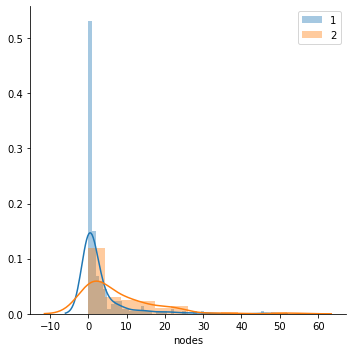

In [24]:
sb.FacetGrid(df,hue='status',size=5).map(sb.distplot,'nodes')
plt.legend()
plt.show()

Text(0.5, 0, 'age')

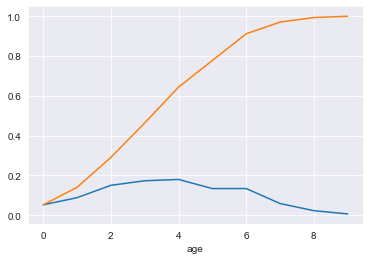

In [17]:
#ploting cdf
hist,bins=np.histogram(df.age,bins=10)
pdf=hist/sum(hist)

cdf=np.cumsum(pdf)
plt.plot(pdf)
plt.plot(cdf)
plt.xlabel('age')


Text(0.5, 0, 'year')

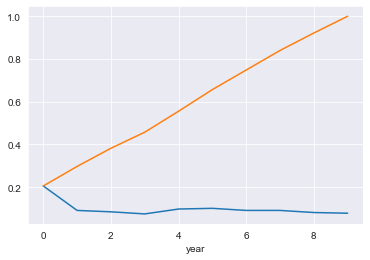

In [18]:
hist,bins=np.histogram(df.year,bins=10)
pdf= hist/sum(hist)
cdf = np.cumsum(pdf)
plt.plot(pdf)
plt.plot(cdf)
plt.xlabel('year')

Text(0.5, 0, 'nodes')

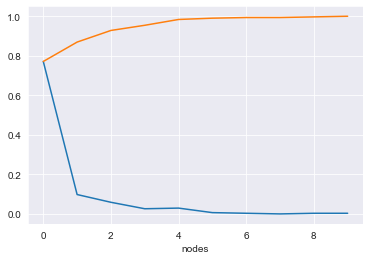

In [19]:
hist,bins=np.histogram(df.nodes,bins=10)
pdf= hist/sum(hist)
cdf = np.cumsum(pdf)
plt.plot(pdf)
plt.plot(cdf)
plt.xlabel('nodes')

Text(0.5, 0, 'status')

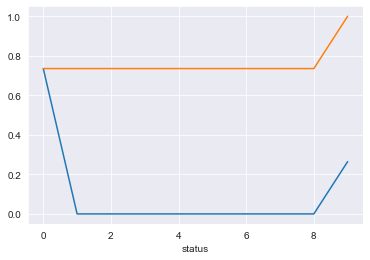

In [20]:
hist,bins=np.histogram(df.status,bins=10)
pdf= hist/sum(hist)
cdf = np.cumsum(pdf)
plt.plot(pdf)
plt.plot(cdf)
plt.xlabel('status')

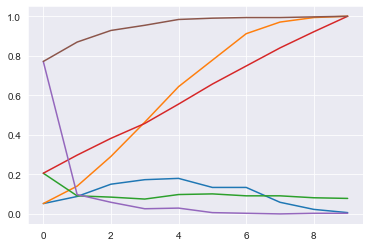

In [21]:
for i in col:
    hist,bins=np.histogram(df[i],bins=10)
    pdf= hist/sum(hist)
    cdf = np.cumsum(pdf)
    plt.plot(pdf)
    plt.plot(cdf)
    

/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='age'>

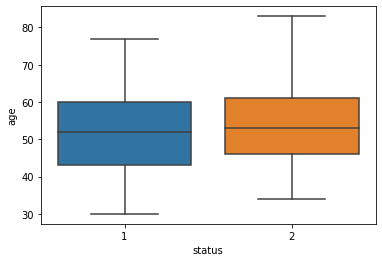

In [40]:
#boxplot

sb.boxplot(df.status,df.age)

/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='age'>

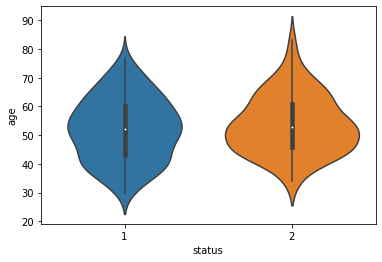

In [41]:
#voilen plot

sb.violinplot(df.status,df.age)

# Bivariate analysis

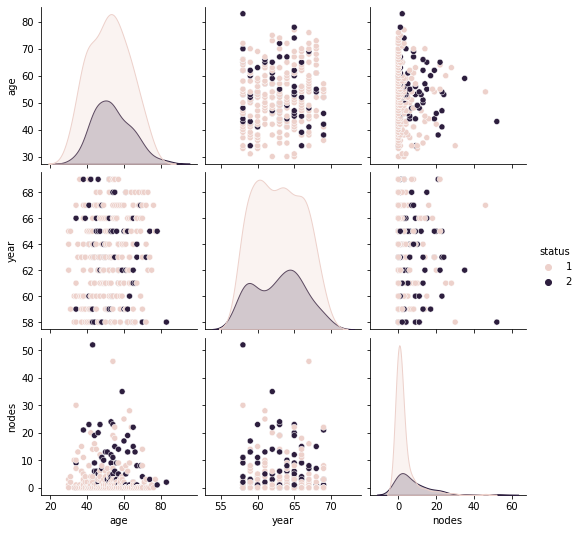

In [43]:
sb.pairplot(df,hue='status')

/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


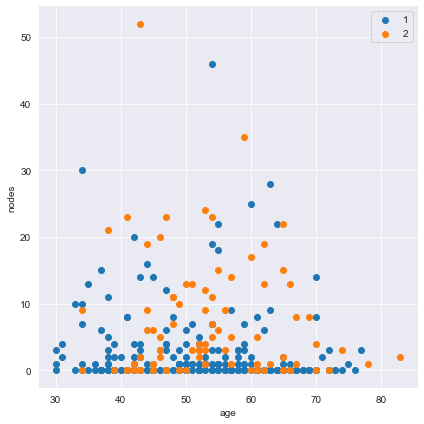

In [9]:
sb.set_style(style='darkgrid')
sb.FacetGrid(df,hue='status',size=6).map(plt.scatter,'age','nodes',)
plt.legend()

1. 95% positive axillary nodes are detected b/w 0-30
2. both survived and unsurvived patients have max 30 positive axillary nodes

/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


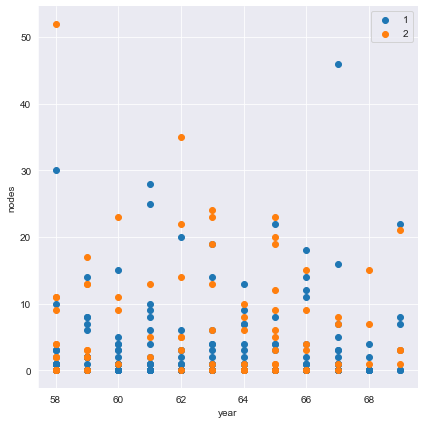

In [14]:
sb.set_style(style='darkgrid')
sb.FacetGrid(df,hue='status',size=6).map(plt.scatter,'year','nodes',)
plt.legend()

1. b/w age of 60 to 64 the max number of patients are survived more then 5 years.
2. one patient age is 58 and having more then 50 positive axillary nodes then that patient was unsurvived.